In [19]:
import os, sys
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats import oneway, weightstats
from utils import check_homogeneity, check_normality

In [2]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
healthy_orange = '#EC6602'
healthy_orange_50 = '#F9B591'
healthy_orange_25 = '#FDDDCB'
siemens_petrol = '#009999'
siemens_petrol_50 = '#87D2D2'
sns.set_palette([healthy_orange, siemens_petrol, healthy_orange_50, healthy_orange_25, siemens_petrol_50])
RANDOM_SEED = 42

In [3]:
df = pd.read_csv('../data/Einkommen.txt')
df.head()

,Familienstand,Geschlecht,Einkommen
0,ledig,m,2940
1,ledig,m,3171
2,ledig,m,2268
3,ledig,m,3360
4,ledig,m,3028


### EDA

In [4]:
df.describe(include='all')

,Familienstand,Geschlecht,Einkommen
count,120,120,120.000000
unique,3,2,NaN
top,ledig,m,NaN
freq,40,60,NaN
mean,NaN,NaN,2091.775000
std,NaN,NaN,857.577156
min,NaN,NaN,338.000000
25%,NaN,NaN,1463.750000
50%,NaN,NaN,2029.000000
75%,NaN,NaN,2803.750000


> hier sieht man die wichtigen Kenngrößen sowohl für kategoriale Variablen (Familienstand & Geschlecht) als auch für Einkommen.

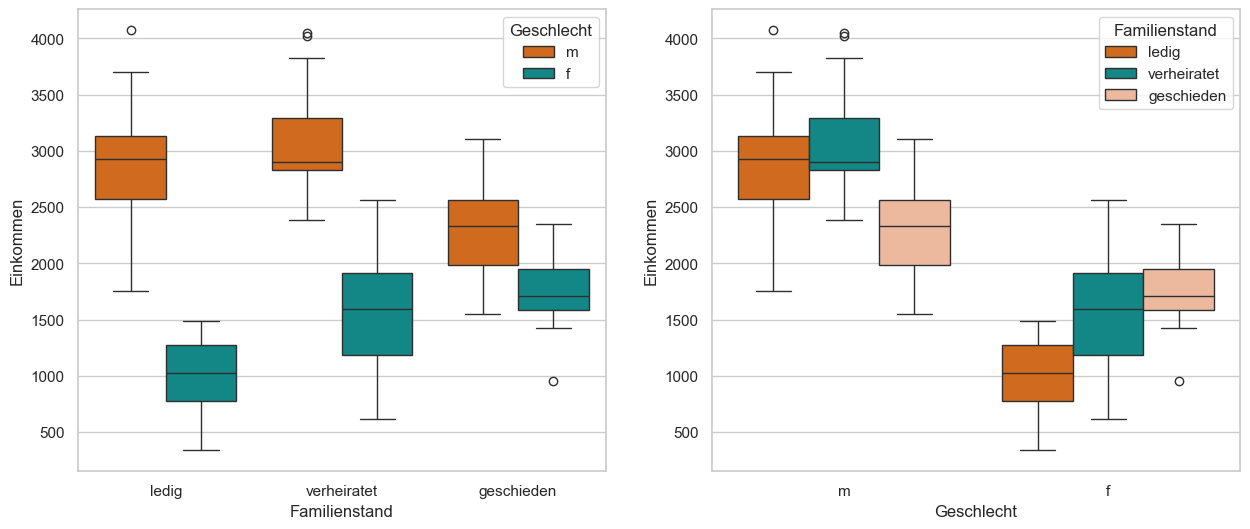

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(data=df, x="Familienstand", y="Einkommen", hue="Geschlecht", ax=ax[0]);
sns.boxplot(data=df, x="Geschlecht", y="Einkommen", hue="Familienstand", ax=ax[1]);

> hier sieht man das die Kategorien von Familienstand kaum ein Unterscheid haben, wobei es gibt einen klaren Unterschied zwichen m und f, das spricht dafür dass Geschlecht einen guten Zusammenhang mit Einkommen haben sollte, weil an der y-Achse haben wir ja Einkommen.

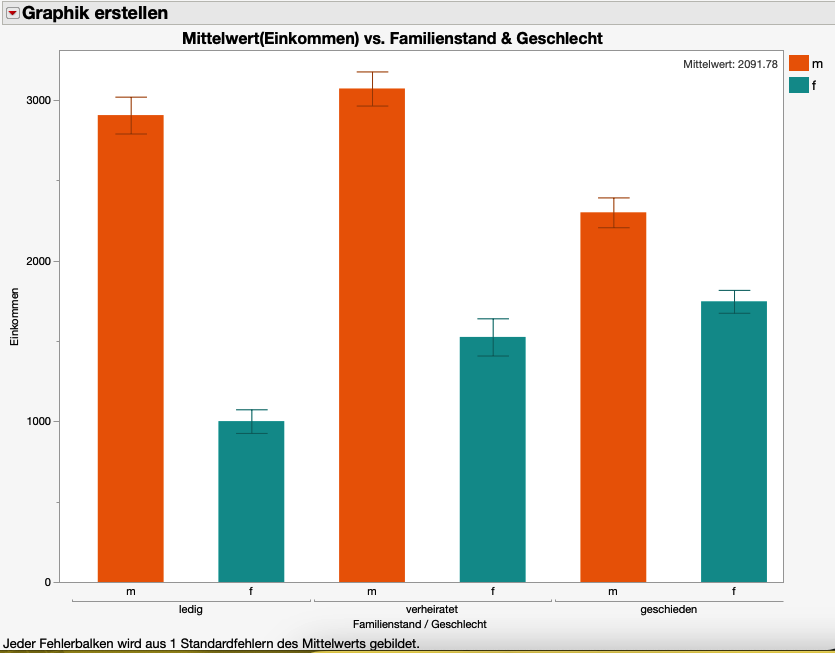

> die gleiche Übersicht haben wir auch mit dem Balkendiagramm sowohl in JMP oben als auch in Python unten, dass es kaum einen Unterschied gibt, zwischen den Ausprägungen von Familienstand, während einen klaren Unterschied zwischen den beiden Geschlechtern.

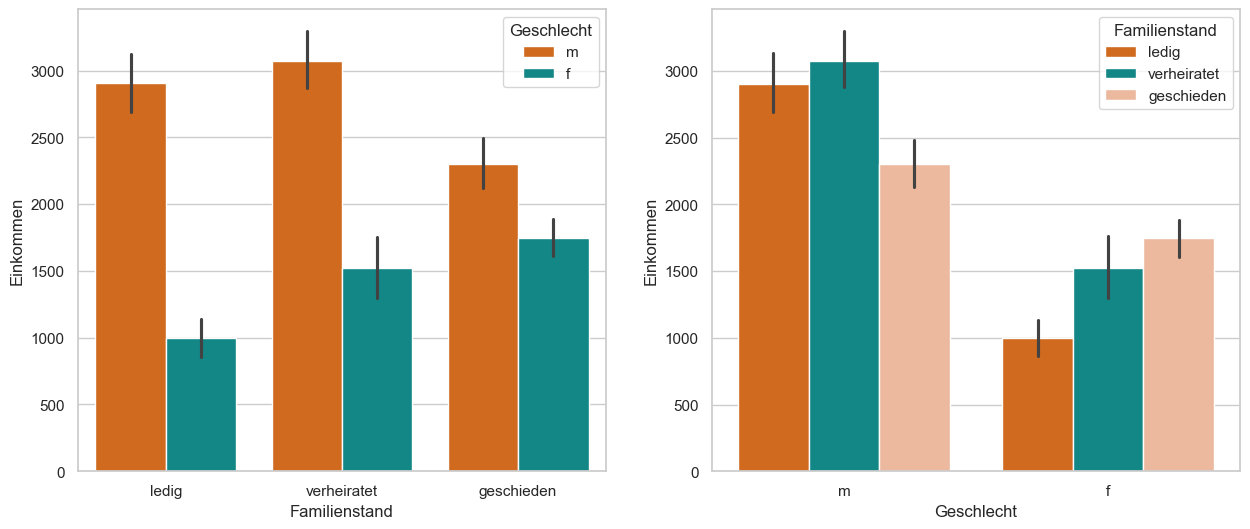

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(data=df, x="Familienstand", y="Einkommen", hue="Geschlecht", estimator='mean', ax=ax[0]);
sns.barplot(data=df, x="Geschlecht", y="Einkommen", hue="Familienstand", estimator='mean', ax=ax[1]);

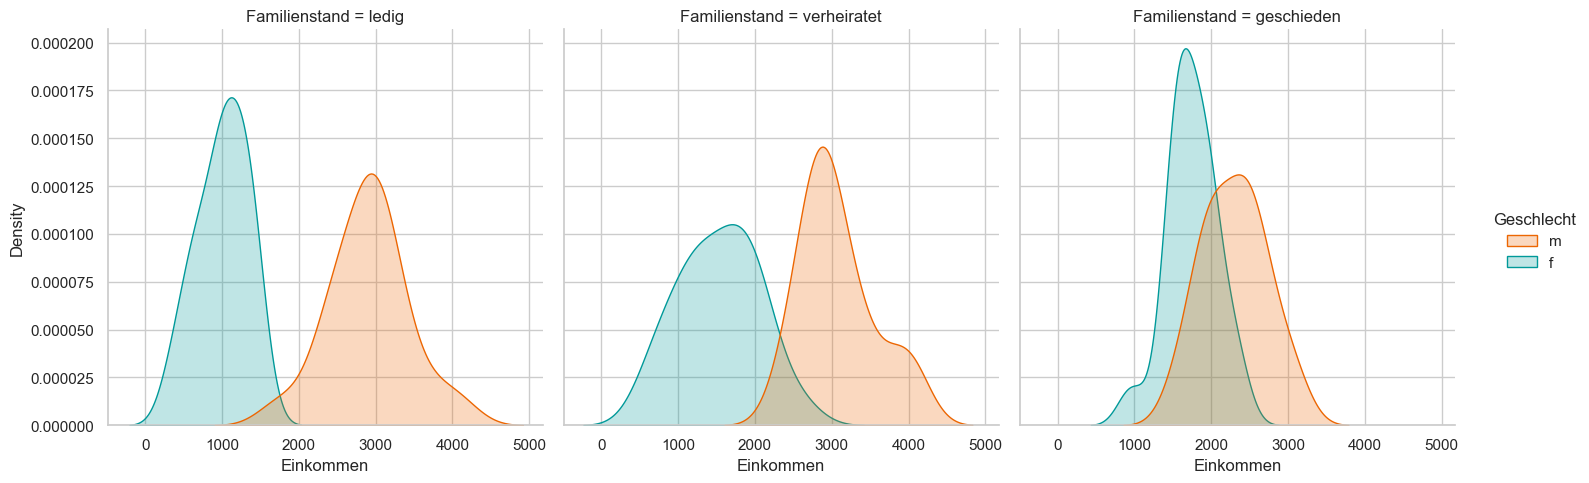

In [7]:
sns.displot(data=df, x='Einkommen', hue='Geschlecht', col='Familienstand', kind='kde', fill=True);

> So sehen die Einkommen Verteilungen für alle Gruppen aus (Familienstand + Geschlecht), sie sehen ungefähr normalverteilt aus und keine Ausreißen zu sehen sind.

#### Einkommen Verteilung:

Einkommen Verteilung ingesamt seiht auch Normalverteilt aus ohne auffälligen Anomalien.

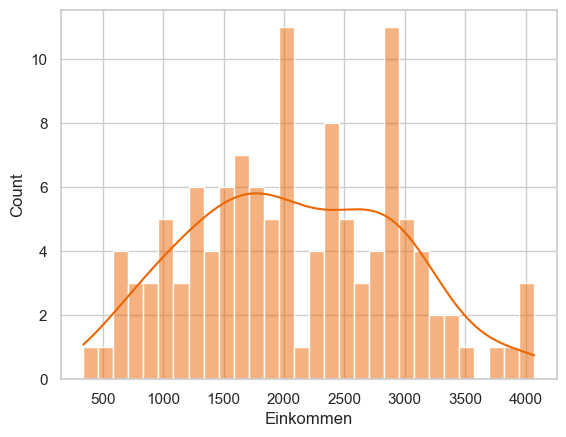

In [8]:
sns.histplot(data=df, x='Einkommen', bins=30, kde=True);

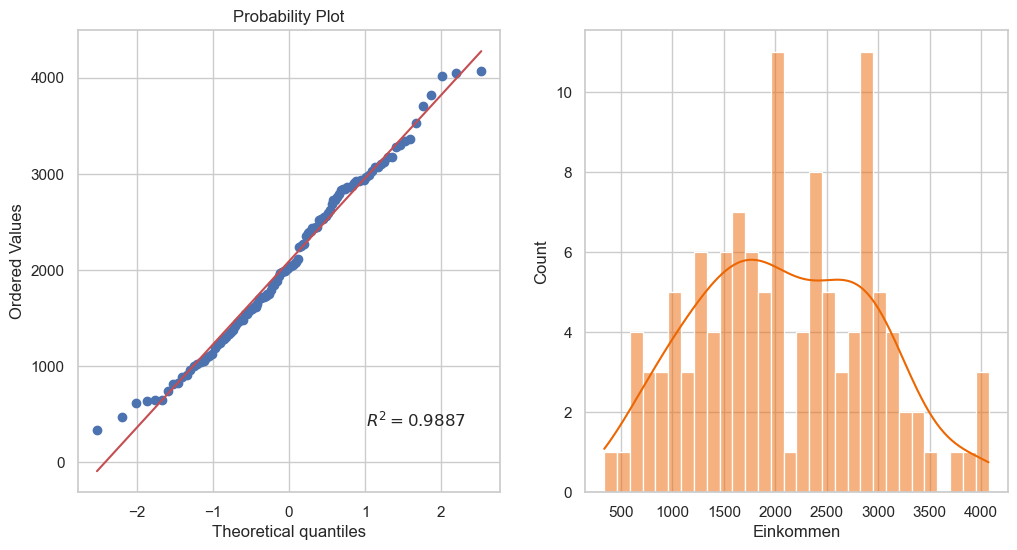

Shapiro-Wilk normality test: p-value = 0.1821765395715676
D'Agostino's K^2 normality test: p-value = 0.12121115920383492
Kolmogorov-Smirnov normality test: p-value = 0.8206409837719422
Anderson-Darling normality test: statistic = 0.4782687465309152, critical value = 0.763


In [9]:
check_normality(df.Einkommen)

> Die alle Testergebnisse sind nicht signifikant, d.h. wir nehmen die null Hypothese an, dass diese Verteilung stammt aus einer normalverteilten Grundgesamtheit. Der QQ Plot und Histogramm sehen auch ganz okay aus.

In [10]:
df.pivot_table(index='Geschlecht', columns='Familienstand', values='Einkommen', aggfunc='mean')

Familienstand,geschieden,ledig,verheiratet
Geschlecht,,,
f,1746.70,1001.25,1525.2
m,2300.55,2905.75,3071.2


> hier sieht man einfach Means für alle 6 Gruppen (Geschlecht + Familienstand)

## Familienstand

### 1. ANOVA

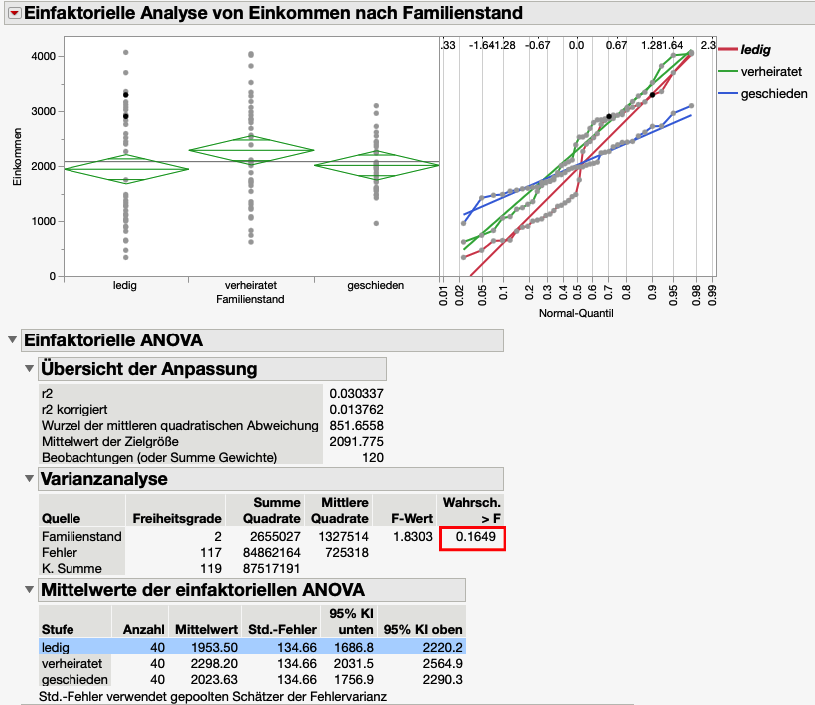

In [11]:
anova_eq_familienstand = oneway.anova_oneway(df.Einkommen, groups=df.Familienstand, use_var='equal')
anova_eq_familienstand

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 1.8302513318751374
pvalue = 0.16493498826406797
df = (2.0, 117.0)
df_num = 2.0
df_denom = 117.0
nobs_t = 120.0
n_groups = 3
means = array([2023.625, 1953.5  , 2298.2  ])
nobs = array([40., 40., 40.])
vars_ = array([ 211993.77884615, 1110776.87179487,  853182.26666667])
use_var = 'equal'
welch_correction = True
tuple = (1.8302513318751374, 0.16493498826406797)

> Hier haben wir kein signifikantes Ergebnis, weil wir den P-Wert 0,16 haben.

### 2. Normalitätstest (Residuen)

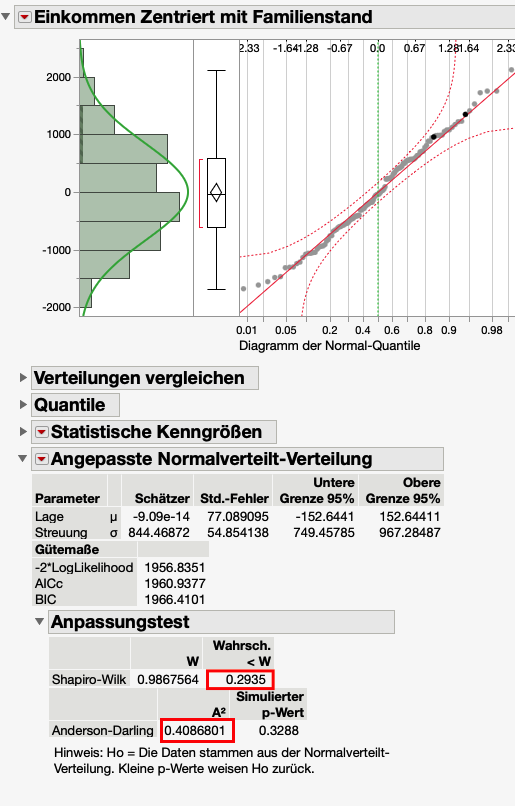

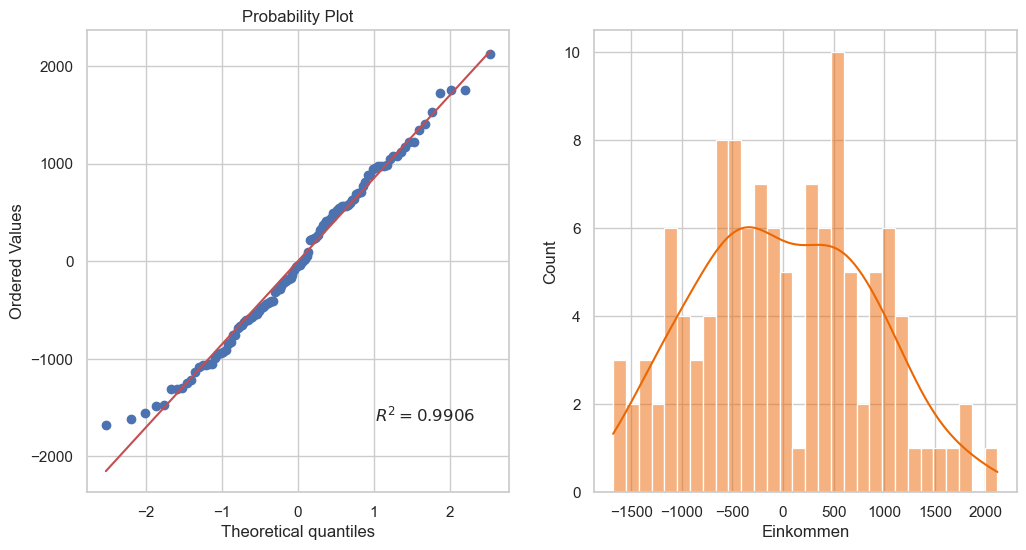

Shapiro-Wilk normality test: p-value = 0.2934805776535455
D'Agostino's K^2 normality test: p-value = 0.13060435574043103
Kolmogorov-Smirnov normality test: p-value = 0.7663407582214308
Anderson-Darling normality test: statistic = 0.40868010927931664, critical value = 0.763


In [12]:
check_normality((df.Einkommen - df.groupby("Familienstand").Einkommen.transform("mean")))

> Nicht signifikantes Ergebnis zeigt, dass die Residuen normalverteilt sind.

### 3. Homogenitätstest

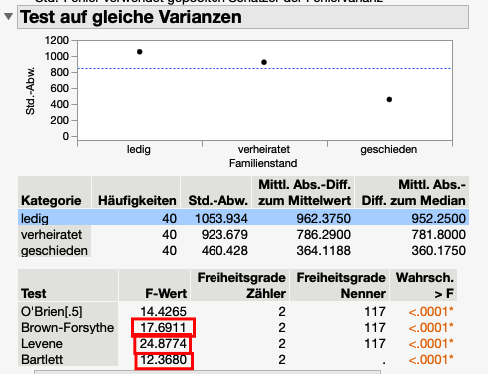

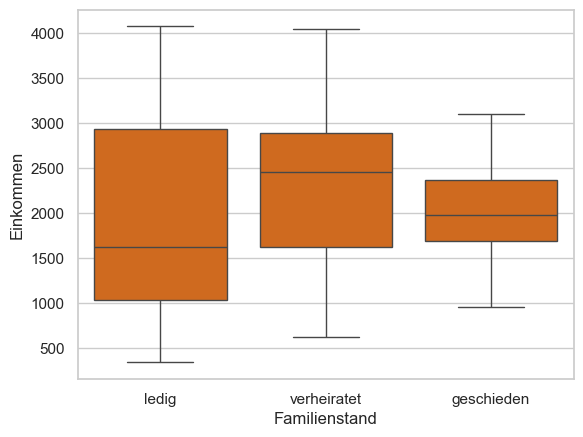

Levene test statistic: 24.87735459050453, p-value = 9.938106225074092e-10
Brown-Forsythe test statistic: 17.69112060797735, p-value = 1.9373720854243855e-07
Bartlett test statistic: 26.878988501234858, p-value = 1.4564708847533162e-06


In [13]:
check_homogeneity(df, 'Familienstand', 'Einkommen')

> Wir haben signifikantes Ergebnis in allen drei Tests, d.h. unsere alternative Hypothese stimmt, das spricht dafür, dass Varianzen allen drei Gruppen kann NICHT als ungefähr gleich angenommen werden. D.h. wir dürfen auch keinen ANOVA Test ausführen.

### 4. Welch Test

> Da wir ungleiche Varianzen haben, sollen wir lieber ANOVA Welch Test machen.

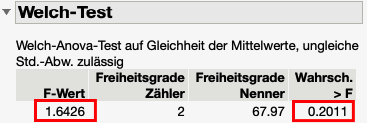

In [14]:
anova_neq_familienstand = oneway.anova_oneway(df.Einkommen, groups=df.Familienstand, use_var='unequal')
anova_neq_familienstand

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 1.6425955395922458
pvalue = 0.20106356663185082
df = (2.0, 67.96990236778487)
df_num = 2.0
df_denom = 67.96990236778487
nobs_t = 120.0
n_groups = 3
means = array([2023.625, 1953.5  , 2298.2  ])
nobs = array([40., 40., 40.])
vars_ = array([ 211993.77884615, 1110776.87179487,  853182.26666667])
use_var = 'unequal'
welch_correction = True
tuple = (1.6425955395922458, 0.20106356663185082)

> Hier haben wir auch kein signifikantes Ergebnis, jetzt können wir sagen, dass es gibt nicht genug Unterschied zwischen den drei Ausprägungen von Familienstand.

## Geschlecht

### 1. t-Test

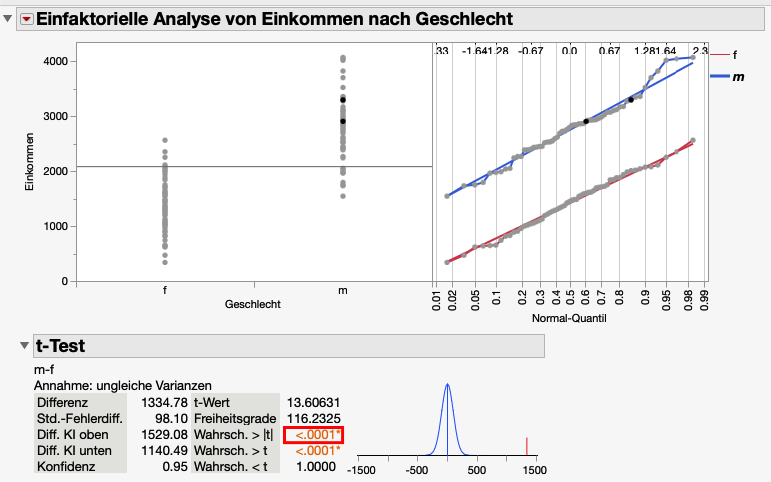

In [15]:
geschlecht_cats = [df[df.Geschlecht == cat].Einkommen for cat in df.Geschlecht.unique()]
tstat, p, dof = weightstats.ttest_ind(*geschlecht_cats, usevar='pooled')
tstat, p, dof

(13.606311102636342, 6.232540198570754e-26, 118.0)

> Wir haben hier ein signifikantes Ergebnis mit einem sehr kleinen p-Wert.

#### ANOVA (anstelle t-Test)

In [16]:
oneway.anova_oneway(df.Einkommen, groups=df.Geschlecht, use_var='equal')

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 185.13170182172502
pvalue = 6.232540198570714e-26
df = (1.0, 118.0)
df_num = 1.0
df_denom = 118.0
nobs_t = 120.0
n_groups = 2
means = array([1424.38333333, 2759.16666667])
nobs = array([60., 60.])
vars_ = array([253107.7319209 , 324312.51412429])
use_var = 'equal'
welch_correction = True
tuple = (185.13170182172502, 6.232540198570714e-26)

> In ANOVA für eine dichotome Variable hat man genau den gleichen p-Wert, wie?

### Normalitätstest (Residuen)

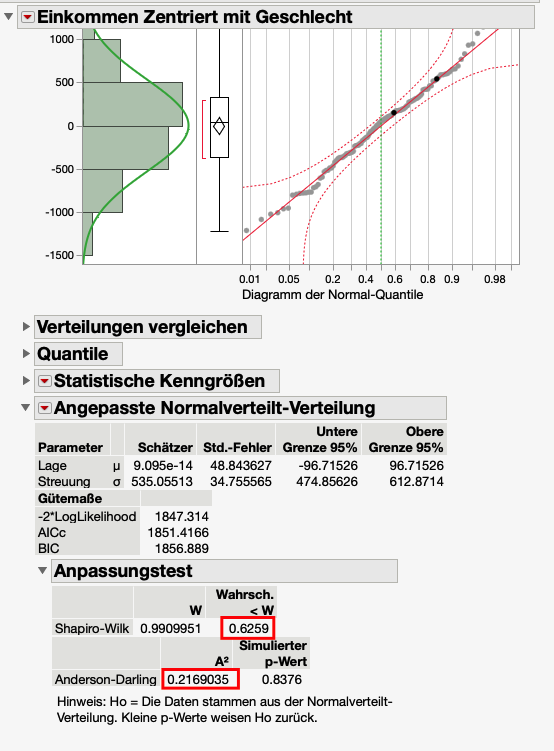

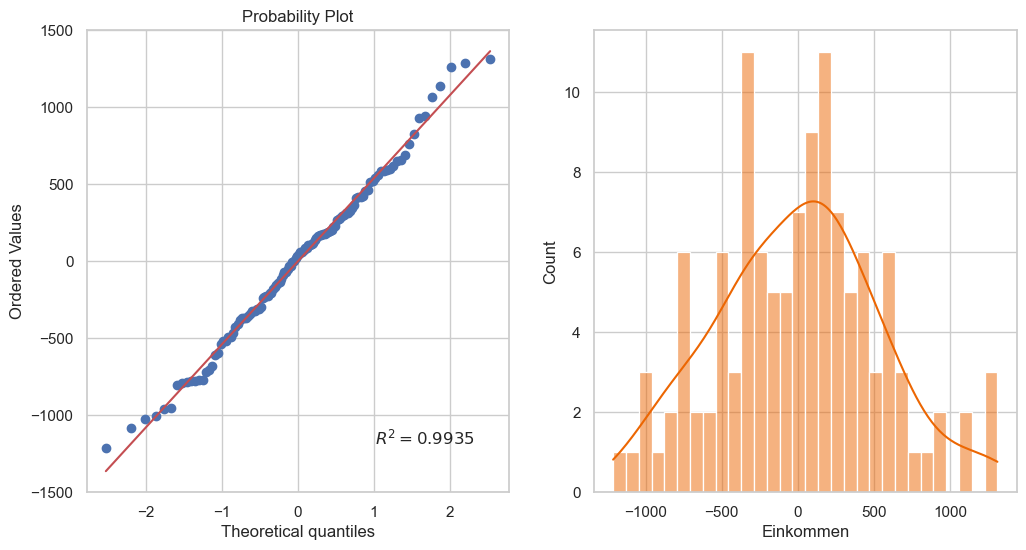

Shapiro-Wilk normality test: p-value = 0.625892199634343
D'Agostino's K^2 normality test: p-value = 0.8661764194863659
Kolmogorov-Smirnov normality test: p-value = 0.9962203352194525
Anderson-Darling normality test: statistic = 0.21690349860915603, critical value = 0.763


In [17]:
check_normality((df.Einkommen - df.groupby("Geschlecht").Einkommen.transform("mean")))

### Homogenitätstest

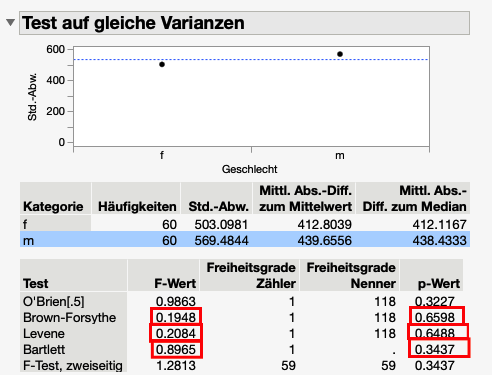

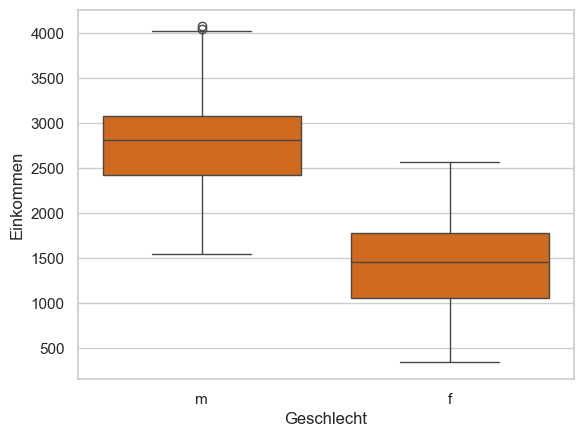

Levene test statistic: 0.20843345349264034, p-value = 0.6488372772401481
Brown-Forsythe test statistic: 0.19478102923972035, p-value = 0.6597744844851119
Bartlett test statistic: 1.6396847332102622, p-value = 0.2003687294736293


In [18]:
check_homogeneity(df, 'Geschlecht', 'Einkommen')

> Hier haben wir kein signifikantes Ergebnis, spricht dass die Homogenität der Varianz angenommen werden kann.

*Note: Warum Bartlett Test Statistik ist anders in JMP als in scipy.stats.bartlett()?*